<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Sofia Hernandez Zatarain y José Pablo Jiménez Mendoza

**Fecha:** 11 Marzo 2023.

**Expediente** :  y 733762
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/josepablojimenez/ProyectoConjunto_JPJM_SHZ.git

# Tarea 4

>### <font color ='red'> **Tarea 4** 
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.
    
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


In [55]:
# Importamos las librerías principales
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import exp, factorial

# ejercicio 1
> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>


\begin{gathered}
F(x)=\frac{2}{\pi} \sin ^{-1}(\sqrt{x}) \\
\frac{2}{\pi} \sin ^{-1}(\sqrt{x})=U \\
\sqrt{x}=\sin \left(\frac{\pi}{2} U\right) \\
x=\sin ^2\left(\frac{\pi}{2} U\right) \\
f(x)=\frac{1}{\pi \sqrt{x} \sqrt{1-x}}
\end{gathered}

In [40]:
# codigo del estudiante 1
def ejeracum(N):
    return (np.sin((np.pi/2)*np.random.random(N)))**2

h = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))

C:\Users\pabul\AppData\Local\Temp\ipykernel_26344\2804120867.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))


0.509659628450896


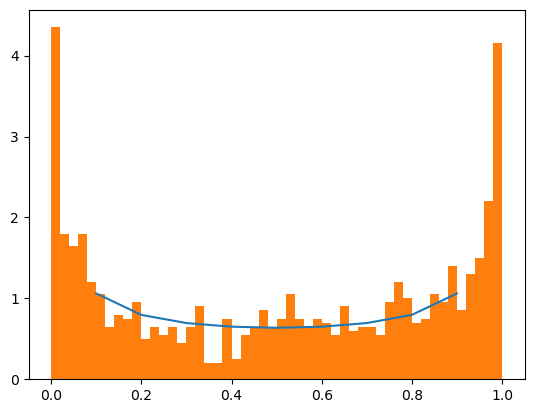

In [41]:
N = 1000
y = ejeracum(N)
x = np.arange(0, 1.1, 0.1)
plt.plot(x, [f(n) for n in x])
plt.hist(y,bins = 50,density=True)
print(np.mean(y))
plt.show()

C:\Users\pabul\AppData\Local\Temp\ipykernel_26344\2804120867.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  f = lambda x: 1/(np.pi*np.sqrt(x)*np.sqrt(1-x))


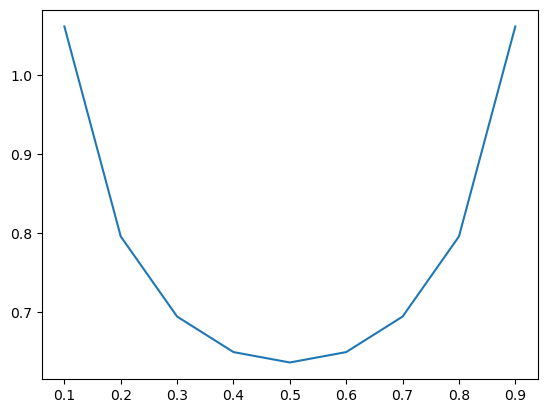

In [42]:
x = np.arange(0, 1.1, 0.1)
plt.plot(x, [f(n) for n in x])
plt.show()

In [ ]:
# codigo estudiante 2

# ejercicio 2
> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

In [48]:
# codigo del estudiante 1
def Gen_distr_discreta(p_acum: 'P.Acumulada de la distribución a generar',
                       indices: 'valores reales a generar aleatoriamente',
                       N: 'cantidad de números aleatorios a generar'):
    
    U =np.random.rand(N)
    # Diccionario de valores aleatorios
    rand2reales = {i: idx for i, idx in enumerate(indices)}

    # Series de los valores aletorios
    j = pd.Series([sum([1 for p in p_acum if p < ui]) for ui in U]).map(rand2reales)

    return j

def plot_histogram_discrete(distribucion:'señal de varibles aleatorias de un distribución DISCRETA dada',
                            label:'label del legend a aparecer en el gráfica',
                            densidad:'por defecto regresa el histograma en densidad'=True):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[10,4])
    j, x = np.histogram(distribucion, bins=len(set(distribucion)), density=densidad) 
    plt.bar(x[1:], j, label=label)
    plt.legend()
    plt.show()
    

# Función que calcula la probabilidad acumulada optimizada
def P_acum_Binomial_o(n,p):
    Pr = np.zeros(n)
    Pr[0] = (1-p)**n
    def pr(i):
        nonlocal Pr
        c  = p/(1-p)
        Pr[i+1]=(c*(n-i)/(i+1))*Pr[i]
        
    # Lleno el vector Pr usando compresión de listas
    [pr(i) for i in range(n-1)]
    return np.cumsum(Pr)

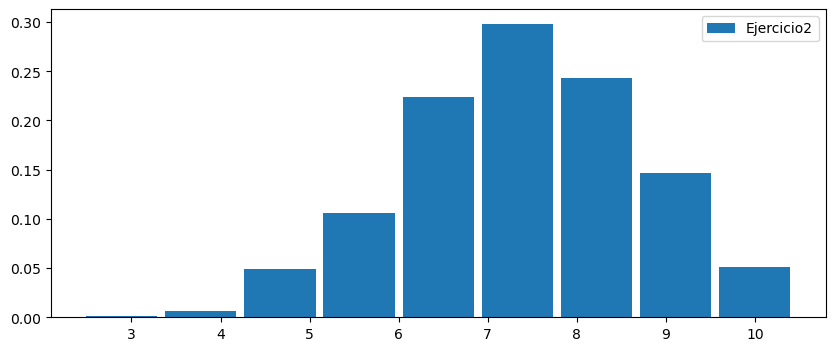

In [52]:
# def D_binomial_intermedia(n,p,N):
n = 10; p = 0.7; N = 10**3

p_acum = P_acum_Binomial_o(n,p)

# Usando el método de la transformada inversa
d_binomial = Gen_distr_discreta(p_acum, np.arange(0, n+1), N)

plot_histogram_discrete(d_binomial, 'Ejercicio2')

In [ ]:
# codigo del estudiante 2

> ## <font color ='red'>Tarea 4: Demostrar la validez de la siguiente ecuación
>$$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i \longrightarrow \text{Hablar de las ventajas que sea recursiva}$$

In [53]:
# codigo del estudiante 1

$$p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
$$P(X=i+1)=\frac{n!}{i!(n-i)!}p^i+1(1-p)^{n-(i+1)}$$
$$=\frac{n!}{(n-i-1)!(i+1)!}p^{i+1}(1-p)^{n-i-1}$$
$$=\frac{n!(n-i)}{(n-i)!i!(i+1)!}p^i(1-p)^{n-i}\frac{p}{1-p}$$
$$=(\frac{n-i}{i+1})(\frac{p}{1-p})\frac{n!}{i!(n-i)!} p^i(1-p)^{n-i}$$
$$=(\frac{n-i}{i+1})(\frac{p}{1-p}) \begin{pmatrix}n\\i\end{pmatrix}p^i(1-p)^{n-i}$$
$$=(\frac{n-i}{i+1})(\frac{p}{1-p})p_i $$

In [3]:
#codigo del estudiante 2

> ## <font color ='red'>Tarea 4
Seguir un procedimiento similar al mostrado cuando se generó una distribución binomial, pero en esta caso genere un código que genere variables aletorias Poisson cuya función de distribución de probabilidad esta dada por:
>$$P(k,\lambda)=\frac{e^{-\lambda}(\lambda)^k}{k!}$$
    
> Demuestre matemáticamente que 
> $$P(k+1)=\frac{\lambda}{k+1}P(k)$$
> y a partir de esta relación genere variables aletorias que distribuyen poisson usando el método de la transformada inversa.

Enlace: https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson
    
$
\begin{aligned}
\frac{p_{k+1}}{p_k}& = \frac{e^{-\lambda}(\lambda)^k}{k!} \\
& = \frac{e^{-\lambda}(\lambda)^k}{k!}
\end{aligned}
$

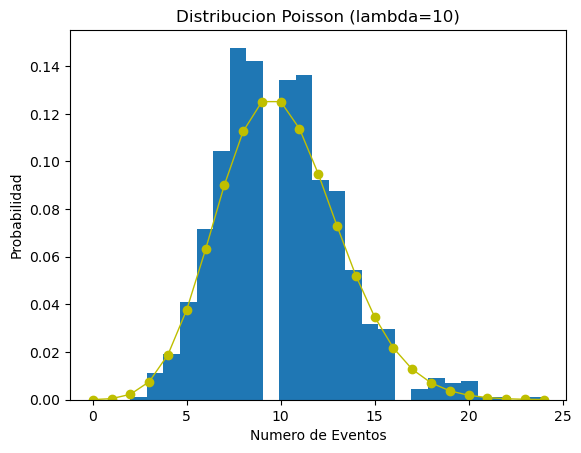

In [79]:
# codigo del estudiante 1
def poisson(k, lam):
    return (np.exp(-lam) * (lam**k)) / factorial(k)

lam = 10
n_4 = 1000

# generate data
data = np.random.poisson(lam, n_4)

# calculate probabilities
probs = [poisson(k, lam) for k in range(max(data) + 1)]

# plot histogram of data
plt.hist(data, bins=max(data) + 1, density=True, alpha=1)

# plot Poisson distribution
plt.plot(range(max(data) + 1), probs, 'yo-', linewidth=1)

# set plot labels
plt.xlabel('Numero de Eventos')
plt.ylabel('Probabilidad')
plt.title(f'Distribucion Poisson (lambda={lam})')

# show plot
plt.show()

In [51]:
# codigo del estudiante 2

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by José Pablo Jiménez Mendoza & Sofia Hernandez Zatarain.
</footer>